In [2]:
# import all libraries
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()
os.path.exists("/Users/zeinab/Downloads/Project1_data")

True

# Read all sheet in a year

In [79]:
#all datasets
all_files_name = ["R98.xlsx", "R99.xlsx", "R1400.xlsx", "R1401.xlsx", "U98.xlsx", "U99.xlsx", "U1400.xlsx", "U1401.xlsx"]
path_data = "/Users/zeinab/Downloads/Project1_data/"
Year = "R98"

In [80]:
# #Read all sheets for a Year
# data = pd.read_excel(path_data + all_files_name[4], Year + 'Data')
# P1 = pd.read_excel(path_data + all_files_name[7], Year + 'P1')
# P2 = pd.read_excel(path_data + all_files_name[7], Year + 'P2')
# P3S01 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S01')
# P3S02 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S02')
# P3S03 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S03')
# P3S04 = pd.read_excel(path_data + all_files_name[4], Year + 'P3S04')
# P3S05 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S05')
# P3S06 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S06')
# P3S07 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S07')
# P3S08 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S08')
# P3S09 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S09')
P3S11 = pd.read_excel(path_data + all_files_name[0], Year + 'P3S11')
# P3S12 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S12')
# P3S13 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S13')
# P3S14 = pd.read_excel(path_data + all_files_name[3], Year + 'P3S14')
# P4S01 = pd.read_excel(path_data + all_files_name[3], Year + 'P4S01')
# P4S02 = pd.read_excel(path_data + all_files_name[3], Year + 'P4S02')
# P4S03 = pd.read_excel(path_data + all_files_name[3], Year + 'P4S03')
# P4S04 = pd.read_excel(path_data + all_files_name[3], Year + 'P4S04')


In [ ]:
data.info()

# Question 1

In [934]:
# read spesific file
P1_test = P1[["Address", "relation", "age", "degree", "occupationalst"]]

# find all age < 6 and fill the null cells
df = P1_test[P1_test.age < 6]
df.degree.fillna("illiterate", inplace=True)
df.occupationalst.fillna("Other",inplace=True)

dele = P1_test[P1_test.age < 6]
dele = P1_test[((P1_test.age < 6))].index
P1_test = P1_test.drop(dele)
P1_test = pd.concat([P1_test, df])

# find all age < 11 and fill the null cells

# (P1_test[(P1_test.age < 11) & (P1_test.degree == 'Elemantry') & (P1_test.occupationalst.isna())]).occupationalst.fillna("Student", inplace=True)
# P1_test[(P1_test.age < 11) & (P1_test.degree == 'Elemantry') & (P1_test.occupationalst.isna())]
test = P1_test[(P1_test.age < 11) & (P1_test.degree == 'Elemantry') & (P1_test.occupationalst.isna())]
P1_test = P1_test.drop(test.index)
test.occupationalst.fillna("Student", inplace=True)
P1_test = pd.concat([P1_test, test])

# drop null degree's rows & occupationalst's rows
P1_test=P1_test[~P1_test.degree.isna()]
P1_U1401=P1_test[~P1_test.occupationalst.isna()]

/var/folders/7y/37m2bn3d6y778v332m4hd77c0000gn/T/ipykernel_68045/2706736989.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.degree.fillna("illiterate", inplace=True)
/var/folders/7y/37m2bn3d6y778v332m4hd77c0000gn/T/ipykernel_68045/2706736989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.degree.fillna("illiterate", inplace=True)

In [935]:
all_q1 = pd.concat([P1_U98, P1_U99, P1_U1400, P1_U1401, P1_R98, P1_R99, P1_R1400, P1_R1401])
all_q1.to_csv('q1.csv', encoding='utf-8', index=False)


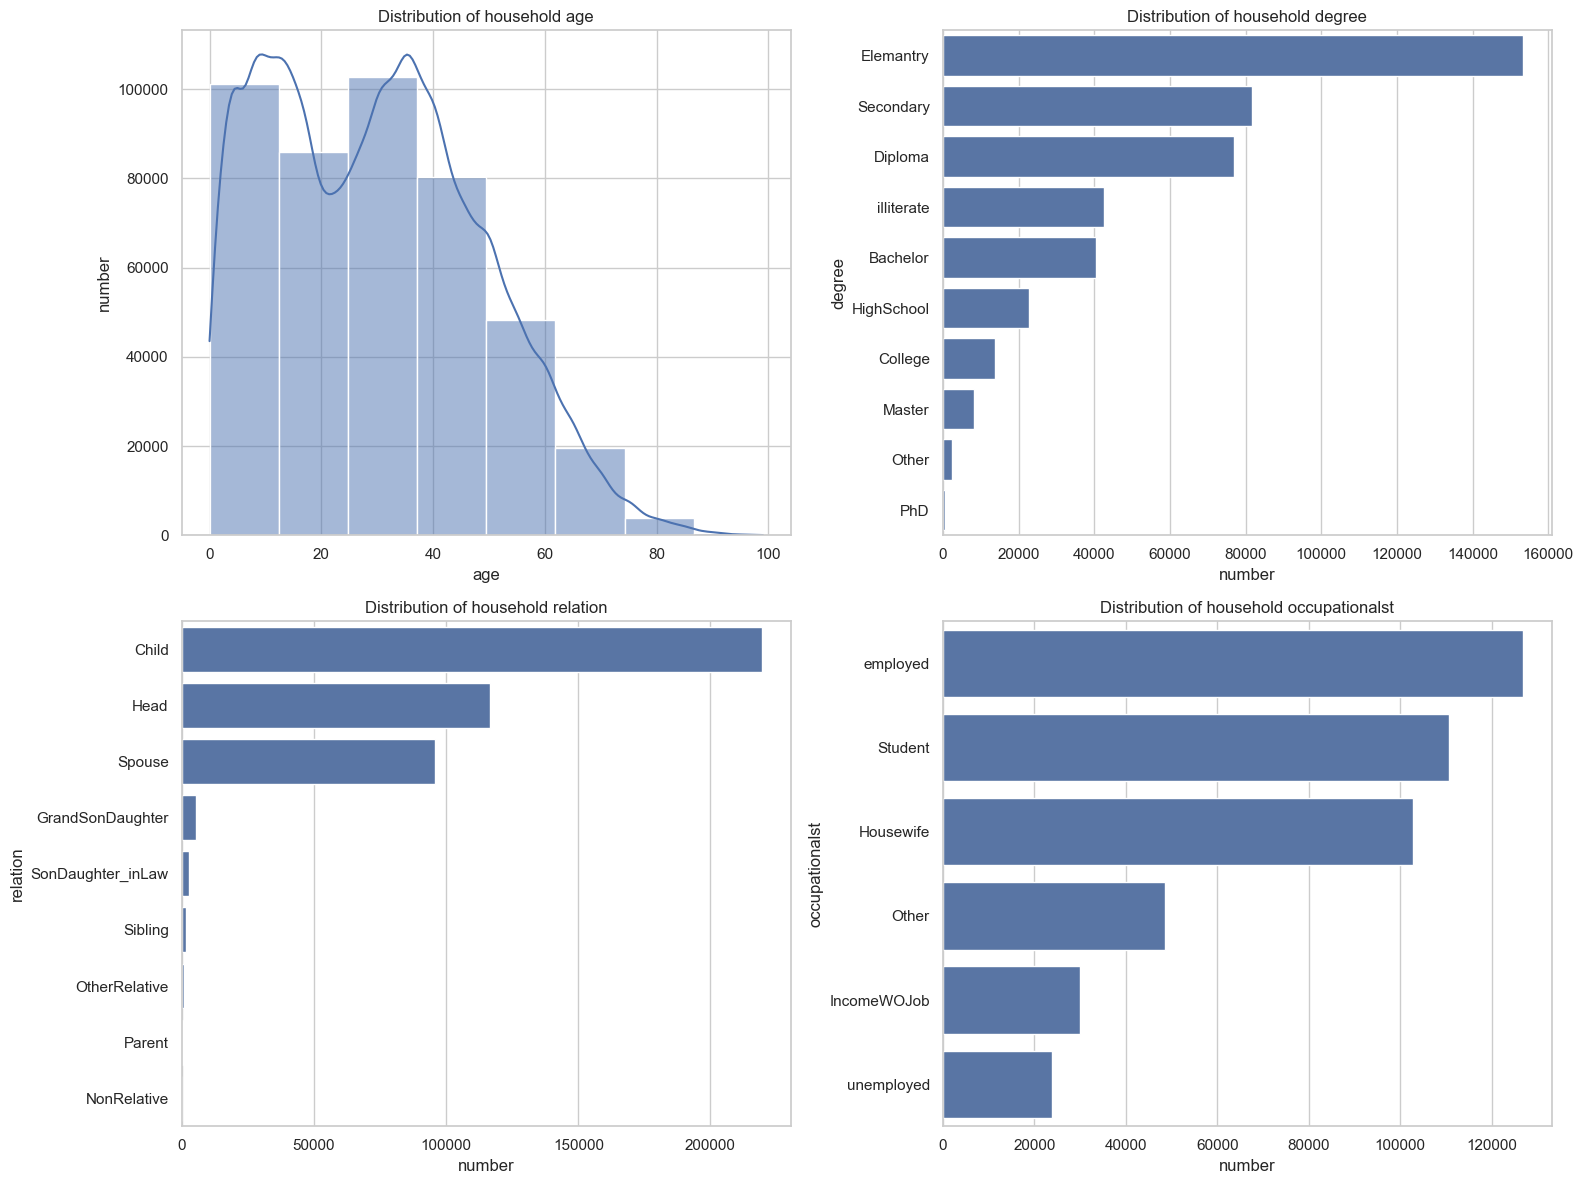

In [936]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of household age (subplot 1)
sns.histplot(all_q1['age'], kde=True, bins=8, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of household age')
axes[0, 0].set_xlabel('age')
axes[0, 0].set_ylabel('number')

# Distribution of household degree (subplot 2)
sns.countplot(y=all_q1['degree'], order=all_q1['degree'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of household degree')
axes[0, 1].set_xlabel('number')
axes[0, 1].set_ylabel('degree')

# Distribution of household relation (subplot 3)
sns.countplot(y=all_q1['relation'], order=all_q1['relation'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of household relation')
axes[1, 0].set_xlabel('number')
axes[1, 0].set_ylabel('relation')

# Distribution of household occupationalst (subplot 4)
sns.countplot(y=all_q1['occupationalst'], order=all_q1['occupationalst'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of household occupationalst')
axes[1, 1].set_xlabel('number')
axes[1, 1].set_ylabel('occupationalst')

plt.tight_layout()
plt.show()



# Question 2

In [28]:
# read spesific file
P2_U1401 = P2[["Address", "vehicle", "motorcycle", "bicycle"]]
# P2_R1401.info()

In [30]:
# بارگذاری داده‌ها از فایل‌های مختلف و افزودن ستون سال
P2_U98['year'] = 1398
P2_R98['year'] = 1398
df_1398 = pd.concat([P2_U98, P2_R98])

P2_R99['year'] = 1399
P2_U99['year'] = 1399
df_1399 = pd.concat([P2_U99, P2_R99])

P2_R1400['year'] = 1400
P2_U1400['year'] = 1400
df_1400 = pd.concat([P2_U1400, P2_R1400])

P2_R1401['year'] = 1401
P2_U1401['year'] = 1401
df_1401 = pd.concat([P2_U1401, P2_R1401])

# ادغام داده‌های همه سال‌ها در یک DataFrame واحد
df = pd.concat([df_1398, df_1399, df_1400, df_1401])

/var/folders/7y/37m2bn3d6y778v332m4hd77c0000gn/T/ipykernel_89437/3733291139.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P2_U1401['year'] = 1401


In [31]:
df

,Address,vehicle,motorcycle,bicycle,year
0,10004004223,True,False,False,1398
1,10004004220,False,True,False,1398
2,10002002810,False,False,False,1398
3,10002002820,True,True,False,1398
4,10002002823,False,True,False,1398
...,...,...,...,...,...
18379,22104612141,False,False,False,1401
18380,22104612526,False,False,False,1401
18381,22104612529,True,True,False,1401
18382,22104612532,True,True,True,1401


/var/folders/7y/37m2bn3d6y778v332m4hd77c0000gn/T/ipykernel_89437/214205694.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df['Nothing'] = df.groupby('year').apply(lambda x: len(x) - (x['vehicle'] | x['motorcycle'] | x['bicycle']).sum()).values


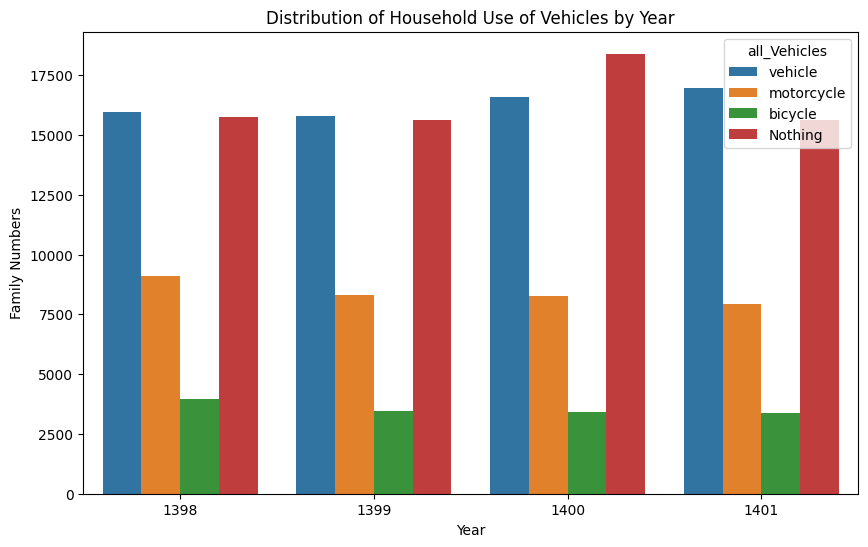

In [32]:
# محاسبه تعداد خانوارهای استفاده کننده از هر وسیله نقلیه به تفکیک سال
grouped_df = df.groupby('year').agg({
    'vehicle': 'sum',
    'motorcycle': 'sum',
    'bicycle': 'sum'
}).reset_index()

# محاسبه تعداد خانوارهایی که از هیچ وسیله نقلیه استفاده نمی‌کنند به تفکیک سال
grouped_df['Nothing'] = df.groupby('year').apply(lambda x: len(x) - (x['vehicle'] | x['motorcycle'] | x['bicycle']).sum()).values

# بازسازی داده‌ها به قالب مناسب برای رسم نمودار
melted_df = grouped_df.melt(id_vars='year', var_name='all_Vehicles', value_name='family_numbers')

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='family_numbers', hue='all_Vehicles', data=melted_df)

# تنظیم عنوان و برچسب‌ها
plt.title('Distribution of Household Use of Vehicles by Year')
plt.xlabel('Year')
plt.ylabel('Family Numbers')

# نمایش نمودار
plt.show()


# Question 4

In [ ]:
P3S11.info()

In [ ]:
P3S11.info()

In [ ]:
P3_U98.Address.unique

In [81]:
P3_R98 =P3S11[P3S11.purchased == 1]

In [ ]:
# بارگذاری داده‌ها از فایل‌های مختلف و افزودن ستون سال
P3_U98['year'] = 1398
P3_R98['year'] = 1398
df_1398 = pd.concat([P3_U98, P3_R98])

P3_R99['year'] = 1399
P3_U99['year'] = 1399
df_1399 = pd.concat([P3_U99, P3_R99])

P3_R1400['year'] = 1400
P3_U1400['year'] = 1400
df_1400 = pd.concat([P3_U1400, P3_R1400])

P3_R1401['year'] = 1401
P3_U1401['year'] = 1401
df_1401 = pd.concat([P3_U1401, P3_R1401])

# ادغام داده‌های همه سال‌ها در یک DataFrame واحد
df = pd.concat([df_1398, df_1399, df_1400, df_1401])

In [85]:
df

,Address,code,purchased,value,year
0,10009008108,111113,1,200000,1398
2,10009008108,111143,1,200000,1398
3,10009008117,111124,1,150000,1398
4,10006005520,111115,1,600000,1398
5,10006005520,111117,1,500000,1398
...,...,...,...,...,...
9092,23006709738,111118,1,1400000,1401
9093,23006709738,111132,1,250000,1401
9094,23006709738,111211,1,10000000,1401
9095,23006709741,111113,1,2500000,1401


/var/folders/7y/37m2bn3d6y778v332m4hd77c0000gn/T/ipykernel_89437/2312420589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P3_R98['year'] = 1398


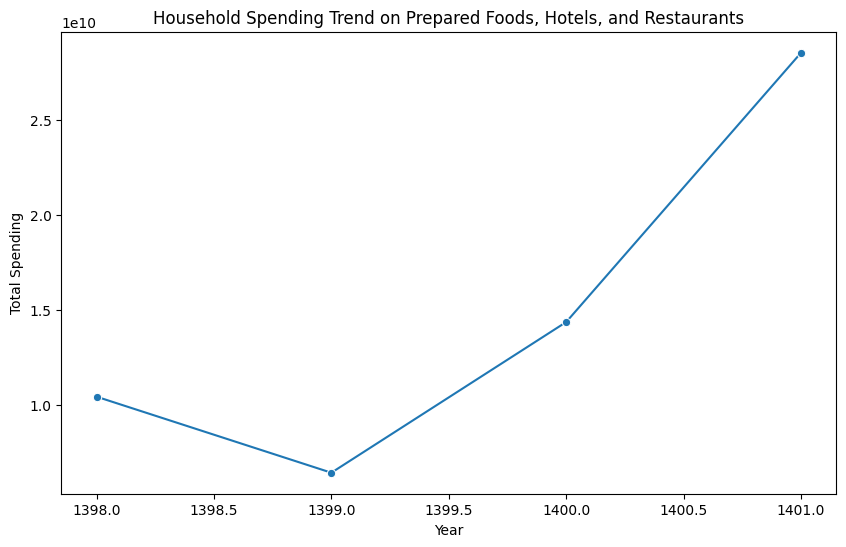

In [82]:
# محاسبه مجموع هزینه برای هر سال
yearly_expenses = df.groupby('year')['value'].sum().reset_index()

# رسم نمودار ترند هزینه
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', data=yearly_expenses, marker='o')

# تنظیم عنوان و برچسب‌ها
plt.title('Household Spending Trend on Prepared Foods, Hotels, and Restaurants')
plt.xlabel('Year')
plt.ylabel('Total Spending')
# نمایش نمودار
plt.show()
